In [126]:
import pandas as pd
import requests

In [127]:
start_year = 1981
end_year = 2020

In [128]:
filename = f"joenju_{start_year}_{end_year}.csv"
URL = f"https://api.taegon.kr/stations/146/?sy={start_year}&ey={end_year}&format=csv"
res = requests.get(URL)
with open(filename, "w", newline="") as f:
    f.write(res.text)

In [129]:
# 파일 읽어오기
df = pd.read_csv(filename)
df.head()
df.tail()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud
14605,2020,12,27,9.6,5.1,1.6,76.3,1.3,0.1,2.1,0.0,7.9
14606,2020,12,28,13.9,6.2,0.5,74.6,1.2,8.0,0.0,0.0,1.8
14607,2020,12,29,6.3,1.9,-1.7,90.4,2.1,1.4,3.2,3.2,8.8
14608,2020,12,30,-1.6,-6.5,-8.6,67.0,3.7,6.4,0.7,5.2,5.4
14609,2020,12,31,-1.2,-5.3,-10.0,69.1,1.3,6.1,0.7,3.3,4.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       14610 non-null  int64  
 1    month     14610 non-null  int64  
 2    day       14610 non-null  int64  
 3    tmax      14610 non-null  float64
 4    tavg      14610 non-null  float64
 5    tmin      14610 non-null  float64
 6    humid     14610 non-null  float64
 7    wind      14610 non-null  float64
 8    sunshine  14610 non-null  float64
 9    rainfall  14610 non-null  float64
 10   snow      14610 non-null  float64
 11   cloud     14610 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.3 MB


In [131]:
df.describe()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud
count,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000
mean,2000.501027,6.522930,15.729637,19.019370,13.498453,8.856783,69.441129,1.599240,5.744867,3.545825,0.099747,5.111150
std,11.543821,3.448821,8.800393,10.045745,9.849207,10.113642,12.384680,0.712676,3.790059,11.925259,0.777169,3.115696
min,1981.000000,1.000000,1.000000,-8.500000,-11.000000,-16.000000,26.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,10.300000,4.900000,0.000000,61.300000,1.100000,2.100000,0.000000,0.000000,2.500000
50%,2000.500000,7.000000,16.000000,20.700000,14.400000,8.900000,70.000000,1.500000,6.400000,0.000000,0.000000,5.100000
75%,2010.750000,10.000000,23.000000,27.700000,22.300000,18.000000,77.800000,1.900000,8.900000,0.800000,0.000000,7.800000
max,2020.000000,12.000000,31.000000,38.900000,32.100000,29.000000,99.800000,7.400000,13.700000,249.500000,18.500000,10.000000


In [132]:
# 컬럼명 확인하기 (빈칸 제거 필요)
print(df.columns)
df.columns.str.strip() #빈칸 제거해주는 함수! strip
# df.columns = [x.strip() for x in df.columns] 이건 교수님 추천 방법

Index(['year', ' month', ' day', ' tmax', ' tavg', ' tmin', ' humid', ' wind',
       ' sunshine', ' rainfall', ' snow', ' cloud'],
      dtype='object')


Index(['year', 'month', 'day', 'tmax', 'tavg', 'tmin', 'humid', 'wind',
       'sunshine', 'rainfall', 'snow', 'cloud'],
      dtype='object')

In [133]:
# 로딩할 때 빈칸 제거하는 방법
df = pd.read_csv(filename, sep='\\s*,\\s*', engine="python") #=> 우왕!
df.columns

Index(['year', 'month', 'day', 'tmax', 'tavg', 'tmin', 'humid', 'wind',
       'sunshine', 'rainfall', 'snow', 'cloud'],
      dtype='object')

In [134]:
df['year']

0        1981
1        1981
2        1981
3        1981
4        1981
         ... 
14605    2020
14606    2020
14607    2020
14608    2020
14609    2020
Name: year, Length: 14610, dtype: int64

In [135]:
#2017년 총강수량
df[df['year']==2017]['rainfall'].sum()





946.1

In [136]:
# 최근20년(2001-2020)과 과거 20년(1981-2000)의 평균 온도 차이를 구하시오. 소수점 2자리까지
# df[(df['year']>=2001)&(df['year']<=2020)]
a=df[(df['year']>=1981)&(df['year']<=2000)]['tavg'].mean()
b= df[(df['year']>=2001)&(df['year']<=2020)]['tavg'].mean()
b-a


0.6882956878850379

In [137]:
# 최근 10년사이(2011-2020)에 강수량이 가장 적었던 해는?
df[(df['year']>=2011)&(df['year']<=2020)].groupby('year')['rainfall'].sum()

year
2011    1621.8
2012    1359.7
2013    1267.8
2014    1206.8
2015     813.5
2016    1117.7
2017     946.1
2018    1332.5
2019     963.8
2020    1780.8
Name: rainfall, dtype: float64

In [138]:
# 최근 10년사이(2011-2020)에 강수량이 가장 많았던 해와 가장 적었던 해의 강수량 차이는? 소수점 1자리까지 표시하시오.
min=df[(df['year']>=2011)&(df['year']<=2020)].groupby('year')['rainfall'].sum().min()
max=df[(df['year']>=2011)&(df['year']<=2020)].groupby('year')['rainfall'].sum().max()
max-min

967.3

In [139]:
# 40년간 일교차(일최고-일최저)가 가장 컸던 날짜는? (20110130 과 같은 형태로 표시하시오.)
# for i in range(1981,2022):
#     df[df['year']==i]['tmax']
df['일교차']=df['tmax']-df['tmin']
df['일교차'].max()
df[df['일교차']==23.2]
# df.columns

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차
7787,2002,4,28,27.4,17.7,4.2,44.5,2.1,9.8,0.0,0.0,4.3,23.2


In [140]:
# 40년간 연 최고기온(여름철 tmax)과 연 최저기온(겨울철 tmin)의 차가 가장 컸던 연도는?
# for i in range(1981,2022):
#     a= df[df['year']==i]['tmax'].max()-df[df['year']==i]['tmin'].min()
a = df[['year','tmax','tmin']].groupby('year')['tmax'].max()-df[['year','tmax','tmin']].groupby('year')['tmin'].min()
a

year
1981    49.0
1982    46.3
1983    47.3
1984    49.8
1985    50.0
1986    48.8
1987    43.3
1988    48.7
1989    45.1
1990    52.2
1991    50.4
1992    43.4
1993    44.8
1994    51.5
1995    45.8
1996    47.5
1997    49.1
1998    46.8
1999    45.6
2000    45.9
2001    48.5
2002    45.9
2003    48.8
2004    49.6
2005    50.8
2006    49.5
2007    42.0
2008    46.1
2009    47.3
2010    46.6
2011    49.6
2012    51.0
2013    53.1
2014    45.7
2015    45.4
2016    49.2
2017    44.8
2018    53.9
2019    42.6
2020    45.1
dtype: float64

In [141]:
# 11월 강수량이 가장 적었던 해는?
df[df['month']==11].groupby('year')['rainfall'].sum()

year
1981     18.4
1982    127.0
1983     51.3
1984     55.8
1985    125.8
1986     37.3
1987     82.8
1988     32.6
1989     65.7
1990     62.9
1991     28.8
1992     64.8
1993     87.1
1994     27.7
1995     21.0
1996     86.9
1997    162.4
1998     21.7
1999     17.1
2000     39.5
2001     15.9
2002     30.9
2003     44.1
2004     59.0
2005     27.8
2006     51.6
2007      8.7
2008     15.5
2009     18.6
2010     15.9
2011    118.9
2012     54.7
2013     79.5
2014     75.0
2015    102.8
2016     37.5
2017      1.4
2018     35.0
2019     51.9
2020     58.5
Name: rainfall, dtype: float64

In [142]:
df1 = df[(df['year']==2020)].groupby('month')['rainfall'].sum()
df1 = df1.reset_index()
# df1 = df1.to_frame()
df1.columns
df1[(df1['month']<=12)&(df1['month']>=10)]['rainfall'].sum()
# df1[df1['month']==10,11]

71.8

In [143]:
df2 = df[(df['year']==2020)].groupby('month')['rainfall'].sum()
df2 = df2.reset_index()
df2.columns
df2
df2[(df2['month']>=1)&(df2['month']<=2)]['rainfall'].sum()

142.70000000000002

In [176]:
# 겨울 가뭄이 심합니다. 10월에서 2월 사이에 강수량 합이 가장 적었던 해는? 2010년 10월부터 2011년
# 2월까지 겨울은 2010년 겨울로 카운트합니다. 마지막 2020년은 2021년 자료가 없으므로, 계산에 포함
# 하지 않습니다. 2020년 1, 2월 자료는 2019년 겨울자료가 되는 겁니다.
import math
b=[]
for i in range(1981,2020):
    df1 = df[(df['year']==i)].groupby('month')['rainfall'].sum()
    df1 = df1.reset_index()
    df2 = df[(df['year']==i+1)].groupby('month')['rainfall'].sum()
    df2 = df2.reset_index()
    a = df1[(df1['month']<=12)&(df1['month']>=10)]['rainfall'].sum()+df2[(df2['month']>=1)&(df2['month']<=2)]['rainfall'].sum()
    print(i, a)
    a=math.floor(a)
    b.append(a)

min(b)


1981 141.60000000000002
1982 320.7
1983 140.0
1984 198.9
1985 313.59999999999997
1986 342.2
1987 227.70000000000005
1988 282.0
1989 280.90000000000003
1990 186.60000000000002
1991 143.0
1992 247.6
1993 222.10000000000002
1994 242.10000000000002
1995 107.2
1996 322.0
1997 270.9
1998 144.3
1999 183.1
2000 236.2
2001 232.89999999999998
2002 202.7
2003 130.6
2004 145.3
2005 131.5
2006 198.10000000000002
2007 116.0
2008 119.5
2009 216.5
2010 166.0
2011 189.2
2012 252.0
2013 136.0
2014 284.7
2015 316.3
2016 302.59999999999997
2017 116.0
2018 239.09999999999997
2019 299.20000000000005


TypeError: 'float' object is not callable

In [145]:
# 최근 3년간 월간 강수량
df1 = df[['year','month','rainfall']].groupby(['year', 'month']).sum()
df2 = df1.tail(35)
df2 = df2.reset_index()

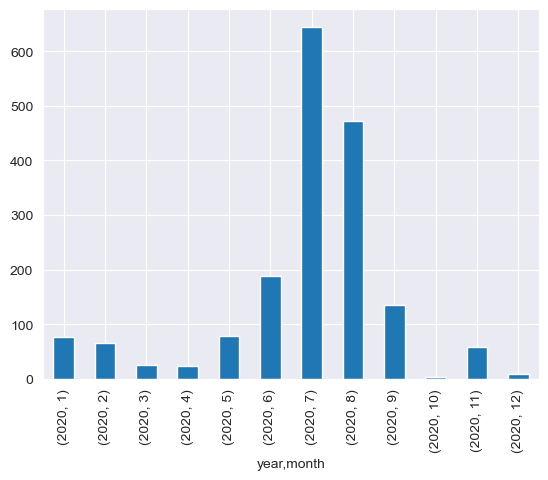

In [146]:
#교수님답
df[df['year']>=2020].groupby(['year', 'month'])['rainfall'].sum().plot.bar();

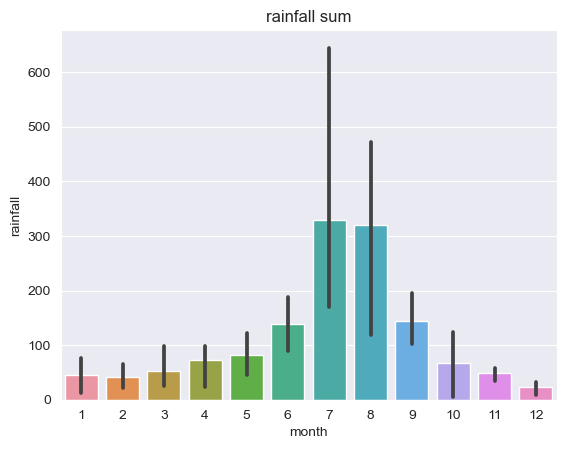

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시본으로 그리면 왜 년도랑 월을 못 합치는것일까!
sns.barplot(data = df2, x='month', y='rainfall')
plt.title("rainfall sum")
plt.show()

**예시 답안**

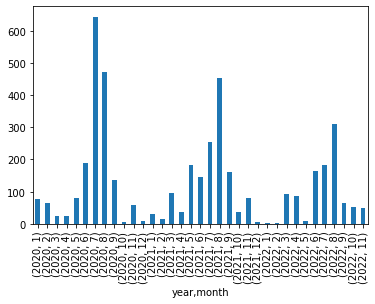

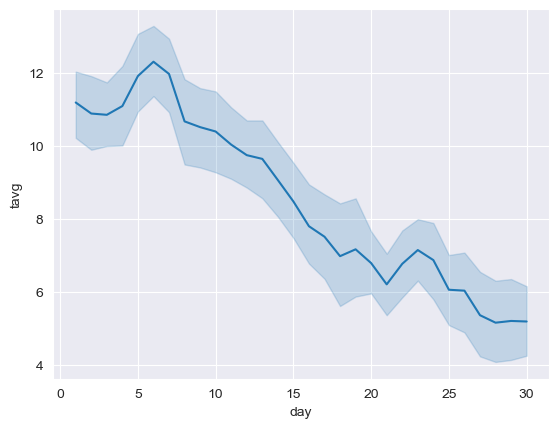

In [148]:
# 평년 대비 올해 11월의 평균온도를 그리시오.
import seaborn as sns

sns.lineplot(data = df[df['month']==11], x='day', y='tavg');
sns.lineplot(data = df[(df['month']==11)&(df['year']==2022)], x='day', y='tavg');

**예시 답안**
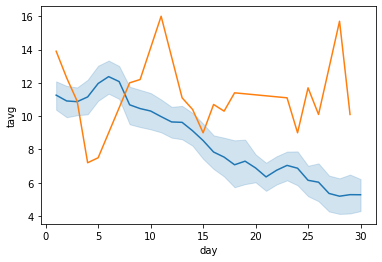

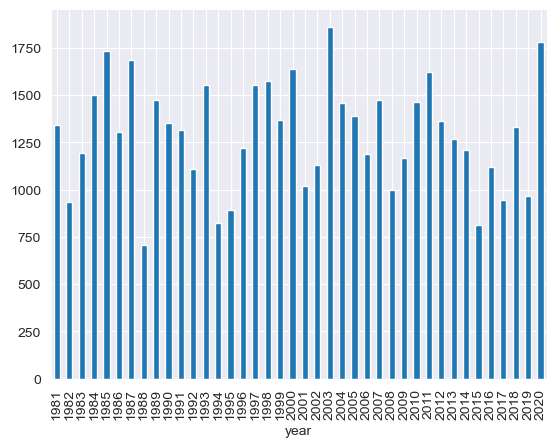

In [149]:
# 연간 총 강수량 변화를 표로 출력하고, 그래프로 그리시오.
df.groupby(['year'])['rainfall'].sum().plot.bar();

**예시 답안**

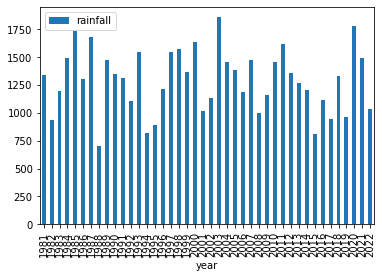

<AxesSubplot:xlabel='year'>

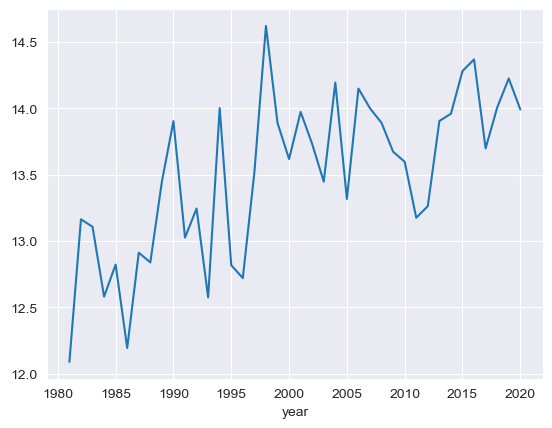

In [150]:
# 연평균 온도변화를 그리시오. (단, 2022년은 제외)
df[df['year'] != 2022 ].groupby('year')['tavg'].mean().plot()

**예시 답안**
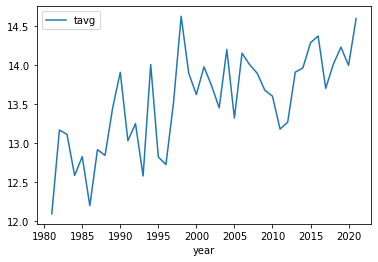

In [151]:
df

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차
0,1981,1,1,4.0,-1.2,-5.4,83.8,3.7,0.0,9.4,6.9,7.5,9.4
1,1981,1,2,-2.2,-4.0,-5.4,91.0,2.6,0.2,5.8,7.5,10.0,3.2
2,1981,1,3,-2.8,-6.3,-10.5,78.5,1.4,8.3,0.0,0.0,2.8,7.7
3,1981,1,4,-3.4,-8.2,-12.6,78.0,0.8,8.3,0.0,0.0,3.8,9.2
4,1981,1,5,-3.5,-7.0,-10.5,71.3,0.9,7.0,0.0,0.0,2.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,2020,12,27,9.6,5.1,1.6,76.3,1.3,0.1,2.1,0.0,7.9,8.0
14606,2020,12,28,13.9,6.2,0.5,74.6,1.2,8.0,0.0,0.0,1.8,13.4
14607,2020,12,29,6.3,1.9,-1.7,90.4,2.1,1.4,3.2,3.2,8.8,8.0
14608,2020,12,30,-1.6,-6.5,-8.6,67.0,3.7,6.4,0.7,5.2,5.4,7.0


In [152]:
len(df)

14610

In [153]:
jday = []
for n in range(1981, 2023):
    for i in range(1, len(df[df['year']==n])+1):
        jday.append(i)

len(jday)

# df['jday'] =


14610

In [154]:
df['jday']=jday
df

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차,jday
0,1981,1,1,4.0,-1.2,-5.4,83.8,3.7,0.0,9.4,6.9,7.5,9.4,1
1,1981,1,2,-2.2,-4.0,-5.4,91.0,2.6,0.2,5.8,7.5,10.0,3.2,2
2,1981,1,3,-2.8,-6.3,-10.5,78.5,1.4,8.3,0.0,0.0,2.8,7.7,3
3,1981,1,4,-3.4,-8.2,-12.6,78.0,0.8,8.3,0.0,0.0,3.8,9.2,4
4,1981,1,5,-3.5,-7.0,-10.5,71.3,0.9,7.0,0.0,0.0,2.3,7.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,2020,12,27,9.6,5.1,1.6,76.3,1.3,0.1,2.1,0.0,7.9,8.0,362
14606,2020,12,28,13.9,6.2,0.5,74.6,1.2,8.0,0.0,0.0,1.8,13.4,363
14607,2020,12,29,6.3,1.9,-1.7,90.4,2.1,1.4,3.2,3.2,8.8,8.0,364
14608,2020,12,30,-1.6,-6.5,-8.6,67.0,3.7,6.4,0.7,5.2,5.4,7.0,365


In [155]:
df[df['year']==2022].groupby('jday')

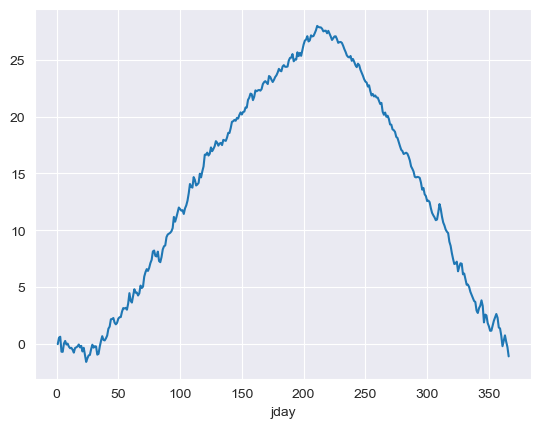

In [156]:
import seaborn as sns
#주황 : 올해 365일평균온도 파랑 : 40년동안 365일별 평균온도

# df[df['year']==2022]['tavg'].mean().plot()
df.groupby('jday')['tavg'].mean().plot();
df[df['year']==2022].groupby('jday')['tavg'].mean().plot();


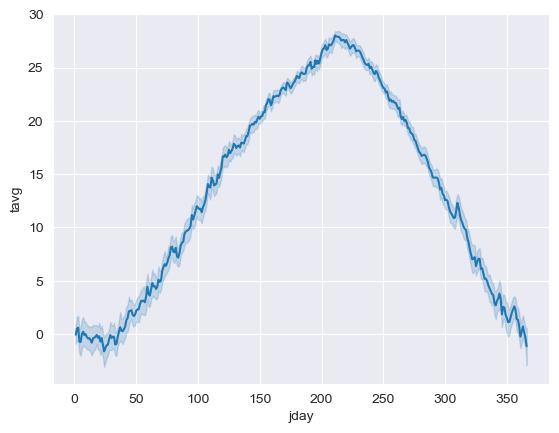

In [157]:
sns.lineplot(data = df, x='jday', y='tavg');
sns.lineplot(data =df[df['year']==2022], x='jday', y='tavg');

**예시 답안**

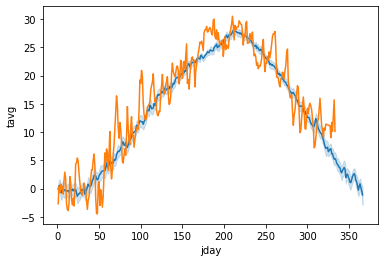